In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from scipy.stats import chi2_contingency

In [8]:
# 读入文件
train_data_df = pd.read_csv("../data/traindata.csv")
train_label_df = pd.read_csv("../data/trainlabel.txt")
features = train_data_df.columns

In [9]:
merged_df = pd.concat([train_data_df, train_label_df])
counts = merged_df.groupby(['workclass', 'label']).size().reset_index(name='count')
pivot_table = counts.pivot(index='workclass', columns='label', values='count').fillna(0)
proportions = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

In [10]:
merged_df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,label
0,77.0,Local-gov,177550.0,Bachelors,13.0,Married-civ-spouse,Adm-clerical,Husband,White,Male,3818.0,0.0,14.0,United-States,NaN
1,40.0,Self-emp-inc,475322.0,Bachelors,13.0,Separated,Craft-repair,Own-child,White,Male,0.0,0.0,50.0,United-States,NaN
2,29.0,Self-emp-not-inc,341672.0,HS-grad,9.0,Married-spouse-absent,Transport-moving,Other-relative,Asian-Pac-Islander,Male,0.0,1564.0,50.0,India,NaN
3,41.0,Private,184378.0,HS-grad,9.0,Separated,Craft-repair,Not-in-family,White,Male,0.0,0.0,40.0,United-States,NaN
4,22.0,Private,306967.0,Some-college,10.0,Never-married,Adm-clerical,Not-in-family,White,Female,0.0,0.0,25.0,United-States,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
22788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
22789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
22790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [ ]:
proportions.plot(kind='bar', stacked=True)
plt.xlabel('Attribute')
plt.ylabel('Percentage')
plt.title('Label Proportions by Attribute')
plt.legend(title='Label')
plt.show()

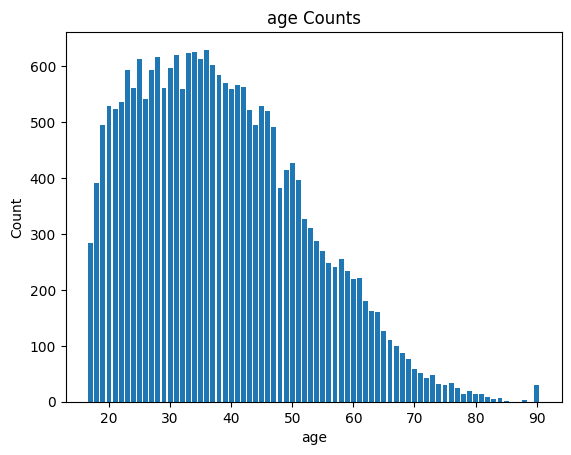

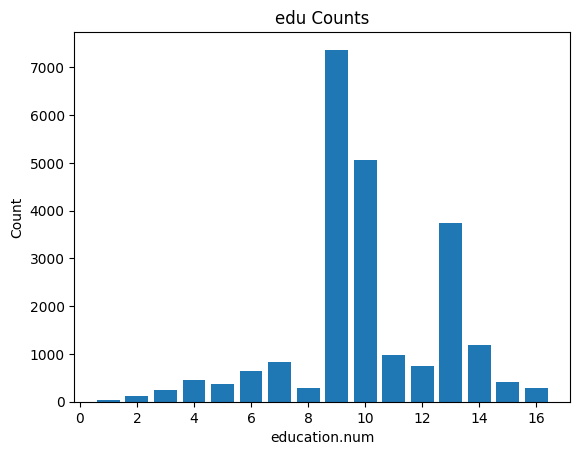

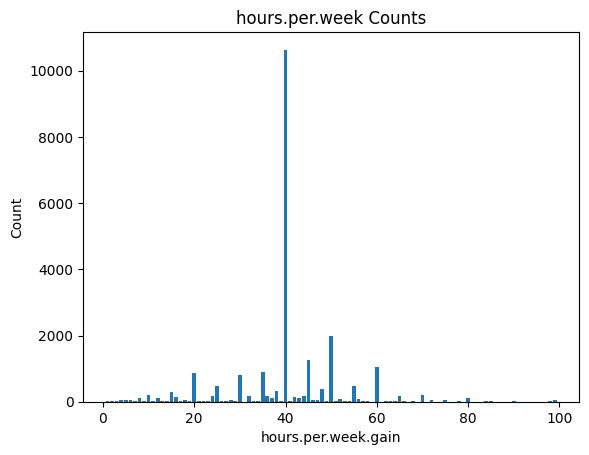

In [3]:
# 统计值出现次数
age_counts = train_data_df['age'].value_counts()
plt.bar(age_counts.index, age_counts.values)
plt.xlabel('age')
plt.ylabel('Count')
plt.title('age Counts')
plt.show()

edu_counts = train_data_df['education.num'].value_counts()
plt.bar(edu_counts.index, edu_counts.values)
plt.xlabel('education.num')
plt.ylabel('Count')
plt.title('edu Counts')
plt.show()

work_hours_counts = train_data_df['hours.per.week'].value_counts()
plt.bar(work_hours_counts.index, work_hours_counts.values)
plt.xlabel('hours.per.week.gain')
plt.ylabel('Count')
plt.title('hours.per.week Counts')
plt.show()

In [4]:
# 顺序赋值
train_data_df.replace('Preschool', 1, inplace=True)
train_data_df.replace('1st-4th', 2, inplace=True)
train_data_df.replace('5th-6th', 3, inplace=True)
train_data_df.replace('7th-8th', 4, inplace=True)
train_data_df.replace('9th', 5, inplace=True)
train_data_df.replace('10th', 6, inplace=True)
train_data_df.replace('11th', 7, inplace=True)
train_data_df.replace('12th', 8, inplace=True)
train_data_df.replace('HS-grad', 9, inplace=True)
train_data_df.replace('Some-college', 10, inplace=True)
train_data_df.replace('Assoc-voc', 11, inplace=True)
train_data_df.replace('Assoc-acdm', 12, inplace=True)
train_data_df.replace('Bachelors', 13, inplace=True)
train_data_df.replace('Prof-school', 14, inplace=True)
train_data_df.replace('Masters', 15, inplace=True)
train_data_df.replace('Doctorate', 16, inplace=True)

In [5]:
# 2.对非数值信息独热编码
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(train_data_df[['workclass', 'marital.status','occupation', 'relationship', 'race', 'sex', 'native.country']]).toarray()
encoded_features = pd.concat([pd.DataFrame(encoded_features), train_data_df[['age', 'fnlwgt', 'education', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']]], axis=1)
encoded_features

,0,1,2,3,4,5,6,7,8,9,...,82,83,84,age,fnlwgt,education,education.num,capital.gain,capital.loss,hours.per.week
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,77,177550,13,13,3818,0,14
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,40,475322,13,13,0,0,50
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,29,341672,9,9,0,1564,50
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,41,184378,9,9,0,0,40
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,22,306967,10,10,0,0,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22787,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,48,79646,7,7,0,0,50
22788,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,26,118523,9,9,0,0,40
22789,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,36,301614,9,9,0,0,40
22790,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,33,335625,10,10,0,0,40


In [6]:
# 数据归一化

encoded_features.columns = encoded_features.columns.astype(str)

# 创建StandardScaler对象，将数据标准化
scaler = StandardScaler()
ss_standardized = scaler.fit_transform(encoded_features)

encoded_features = pd.DataFrame(ss_standardized)
encoded_features

,0,1,2,3,4,5,6,7,8,9,...,82,83,84,85,86,87,88,89,90,91
0,-0.243728,-0.175098,3.782449,-0.014813,-1.515578,-0.189737,-0.286956,-0.206136,-0.018738,-0.396990,...,0.340984,-0.045458,-0.022952,2.821506,-0.114762,1.094049,1.131681,0.38330,-0.214689,-2.148673
1,-0.243728,-0.175098,-0.264379,-0.014813,-1.515578,5.270463,-0.286956,-0.206136,-0.018738,-0.396990,...,0.340984,-0.045458,-0.022952,0.108878,2.706469,1.094049,1.131681,-0.14506,-0.214689,0.775212
2,-0.243728,-0.175098,-0.264379,-0.014813,-1.515578,-0.189737,3.484849,-0.206136,-0.018738,-0.396990,...,-2.932691,-0.045458,-0.022952,-0.697579,1.440206,-0.420042,-0.416186,-0.14506,3.690793,0.775212
3,-0.243728,-0.175098,-0.264379,-0.014813,0.659814,-0.189737,-0.286956,-0.206136,-0.018738,-0.396990,...,0.340984,-0.045458,-0.022952,0.182192,-0.050070,-0.420042,-0.416186,-0.14506,-0.214689,-0.036978
4,-0.243728,-0.175098,-0.264379,-0.014813,0.659814,-0.189737,-0.286956,-0.206136,-0.018738,-0.396990,...,0.340984,-0.045458,-0.022952,-1.210779,1.111395,-0.041519,-0.029219,-0.14506,-0.214689,-1.255264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22787,-0.243728,-0.175098,-0.264379,-0.014813,0.659814,-0.189737,-0.286956,-0.206136,-0.018738,-0.396990,...,0.340984,-0.045458,-0.022952,0.695392,-1.042350,-1.177087,-1.190120,-0.14506,-0.214689,0.775212
22788,-0.243728,-0.175098,-0.264379,-0.014813,-1.515578,-0.189737,3.484849,-0.206136,-0.018738,-0.396990,...,0.340984,-0.045458,-0.022952,-0.917522,-0.674011,-0.420042,-0.416186,-0.14506,-0.214689,-0.036978
22789,-0.243728,-0.175098,-0.264379,-0.014813,0.659814,-0.189737,-0.286956,-0.206136,-0.018738,-0.396990,...,0.340984,-0.045458,-0.022952,-0.184379,1.060678,-0.420042,-0.416186,-0.14506,-0.214689,-0.036978
22790,4.102940,-0.175098,-0.264379,-0.014813,-1.515578,-0.189737,-0.286956,-0.206136,-0.018738,2.518958,...,0.340984,-0.045458,-0.022952,-0.404322,1.382914,-0.041519,-0.029219,-0.14506,-0.214689,-0.036978


In [7]:
# 相关性分析
correlation_matrix = encoded_features.corr()
correlation_matrix

,0,1,2,3,4,5,6,7,8,9,...,82,83,84,85,86,87,88,89,90,91
0,1.000000,-0.042676,-0.064436,-0.003610,-0.369388,-0.046244,-0.069939,-0.050241,-0.004567,-0.027801,...,0.008188,-0.002671,-0.005594,0.044727,-0.008511,-0.073067,-0.073393,-0.014415,-0.016849,-0.176715
1,-0.042676,1.000000,-0.046292,-0.002594,-0.265375,-0.033223,-0.050246,-0.036094,-0.003281,0.017843,...,0.016588,-0.002267,-0.004019,0.050002,-0.007304,0.060866,0.061741,-0.005822,0.010338,0.012864
2,-0.064436,-0.046292,1.000000,-0.003916,-0.400687,-0.050162,-0.075865,-0.054498,-0.004954,0.034316,...,0.034930,-0.000276,0.001672,0.060768,-0.001558,0.111343,0.102001,-0.004179,0.012041,0.006418
3,-0.003610,-0.002594,-0.003916,1.000000,-0.022450,-0.002811,-0.004251,-0.003053,-0.000278,0.002758,...,0.005051,-0.000673,-0.000340,-0.020976,0.007034,-0.015193,-0.015336,-0.002149,-0.003180,-0.020038
4,-0.369388,-0.265375,-0.400687,-0.022450,1.000000,-0.287561,-0.434905,-0.312415,-0.028399,0.001994,...,-0.045011,0.011058,0.002662,-0.198837,0.046345,-0.128896,-0.127571,-0.041370,-0.025939,-0.016966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,-0.073067,0.060866,0.111343,-0.015193,-0.128896,0.076547,0.012829,0.107096,-0.008757,-0.004618,...,0.097069,-0.004450,-0.002401,0.046240,-0.041456,1.000000,0.995165,0.119487,0.080752,0.148748
88,-0.073393,0.061741,0.102001,-0.015336,-0.127571,0.081135,0.018127,0.103969,-0.008705,-0.005213,...,0.100060,-0.003574,-0.002151,0.042687,-0.041059,0.995165,1.000000,0.126071,0.081326,0.150624
89,-0.014415,-0.005822,-0.004179,-0.002149,-0.041370,0.106345,0.025893,-0.009762,-0.001287,-0.018166,...,0.003697,-0.001090,-0.001859,0.076805,-0.006404,0.119487,0.126071,1.000000,-0.031143,0.088906
90,-0.016849,0.010338,0.012041,-0.003180,-0.025939,0.036728,0.016448,0.000524,-0.004023,-0.023279,...,0.008549,0.000380,-0.004927,0.049827,-0.006327,0.080752,0.081326,-0.031143,1.000000,0.059757


In [8]:
# 获取独热编码后的特征名称
encoded_feature_names = encoder.get_feature_names_out(['workclass', 'marital.status','occupation', 'relationship', 'race', 'sex', 'native.country'])
arr = np.array(['age','fnlwgt', 'education', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week'])
encoded_feature_names = np.append(encoded_feature_names, arr)
for i in range(len(encoded_feature_names)):
    print(i, encoded_feature_names[i])
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        if i >= j or i == 44: continue
        e = correlation_matrix[i][j]
        if e > 0.6 or e < -0.6: 
            print(i, encoded_feature_names[i], j, encoded_feature_names[j], e)
            if i in encoded_features.columns: encoded_features = encoded_features.drop(i, axis=1)
                
                

0 workclass_?
1 workclass_Federal-gov
2 workclass_Local-gov
3 workclass_Never-worked
4 workclass_Private
5 workclass_Self-emp-inc
6 workclass_Self-emp-not-inc
7 workclass_State-gov
8 workclass_Without-pay
9 marital.status_Divorced
10 marital.status_Married-AF-spouse
11 marital.status_Married-civ-spouse
12 marital.status_Married-spouse-absent
13 marital.status_Never-married
14 marital.status_Separated
15 marital.status_Widowed
16 occupation_?
17 occupation_Adm-clerical
18 occupation_Armed-Forces
19 occupation_Craft-repair
20 occupation_Exec-managerial
21 occupation_Farming-fishing
22 occupation_Handlers-cleaners
23 occupation_Machine-op-inspct
24 occupation_Other-service
25 occupation_Priv-house-serv
26 occupation_Prof-specialty
27 occupation_Protective-serv
28 occupation_Sales
29 occupation_Tech-support
30 occupation_Transport-moving
31 relationship_Husband
32 relationship_Not-in-family
33 relationship_Other-relative
34 relationship_Own-child
35 relationship_Unmarried
36 relationship_W

In [9]:
encoded_features

,1,2,3,4,5,6,7,8,9,10,...,81,82,83,84,85,86,88,89,90,91
0,-0.175098,3.782449,-0.014813,-1.515578,-0.189737,-0.286956,-0.206136,-0.018738,-0.396990,-0.027321,...,-0.025662,0.340984,-0.045458,-0.022952,2.821506,-0.114762,1.131681,0.38330,-0.214689,-2.148673
1,-0.175098,-0.264379,-0.014813,-1.515578,5.270463,-0.286956,-0.206136,-0.018738,-0.396990,-0.027321,...,-0.025662,0.340984,-0.045458,-0.022952,0.108878,2.706469,1.131681,-0.14506,-0.214689,0.775212
2,-0.175098,-0.264379,-0.014813,-1.515578,-0.189737,3.484849,-0.206136,-0.018738,-0.396990,-0.027321,...,-0.025662,-2.932691,-0.045458,-0.022952,-0.697579,1.440206,-0.416186,-0.14506,3.690793,0.775212
3,-0.175098,-0.264379,-0.014813,0.659814,-0.189737,-0.286956,-0.206136,-0.018738,-0.396990,-0.027321,...,-0.025662,0.340984,-0.045458,-0.022952,0.182192,-0.050070,-0.416186,-0.14506,-0.214689,-0.036978
4,-0.175098,-0.264379,-0.014813,0.659814,-0.189737,-0.286956,-0.206136,-0.018738,-0.396990,-0.027321,...,-0.025662,0.340984,-0.045458,-0.022952,-1.210779,1.111395,-0.029219,-0.14506,-0.214689,-1.255264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22787,-0.175098,-0.264379,-0.014813,0.659814,-0.189737,-0.286956,-0.206136,-0.018738,-0.396990,-0.027321,...,-0.025662,0.340984,-0.045458,-0.022952,0.695392,-1.042350,-1.190120,-0.14506,-0.214689,0.775212
22788,-0.175098,-0.264379,-0.014813,-1.515578,-0.189737,3.484849,-0.206136,-0.018738,-0.396990,-0.027321,...,-0.025662,0.340984,-0.045458,-0.022952,-0.917522,-0.674011,-0.416186,-0.14506,-0.214689,-0.036978
22789,-0.175098,-0.264379,-0.014813,0.659814,-0.189737,-0.286956,-0.206136,-0.018738,-0.396990,-0.027321,...,-0.025662,0.340984,-0.045458,-0.022952,-0.184379,1.060678,-0.416186,-0.14506,-0.214689,-0.036978
22790,-0.175098,-0.264379,-0.014813,-1.515578,-0.189737,-0.286956,-0.206136,-0.018738,2.518958,-0.027321,...,-0.025662,0.340984,-0.045458,-0.022952,-0.404322,1.382914,-0.029219,-0.14506,-0.214689,-0.036978
